<a href="https://colab.research.google.com/github/Ashutoshai/ImageProcessing/blob/master/AshutoshPandaSession3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Importing Keras dependency and MNIST dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


Downloading the MNIST data.

training set is a subset of the data set used to train a model.

X_train is the training data set.

y_train is the set of labels to all the data in x_train

X_test is the test data set

y_test is the set of labels to all the data in x_test

(60000, 28, 28)


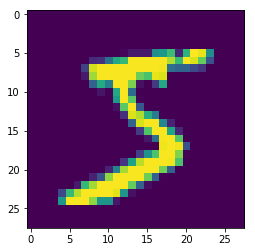

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

X_train.shape print the dimensionality of the sample

plt.imgshow displays the image on the axes

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)


transform our dataset to shape(0,depth(1),width(28),height(28))

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


convert our data type to float32 and normalize our data values to the range [0,1]

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)


picking first 10 training samples

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

splitting y_train and y_test data into 10 distinct class labels

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Reserve 10X10 matrix for validation

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(15, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(15, 3, 3, activation='relu')) # 24
model.add(Convolution2D(25, 3, 3, activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(15, 1, 1, activation='relu')) # 11

model.add(Convolution2D(15, 3, 3, activation='relu')) # 9
model.add(Convolution2D(25, 3, 3, activation='relu')) # 7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 15)        150       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 15)        2040      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 25)        3400      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 25)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 15)        390       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 15)          2040      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 25)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

input: 28x28 images with 1 channels this applies 15 convolution filters of size 3x3 each.

first convolution out put (26x 26 x 15)

2nd convolution out put (24x 24 x 15)

3rd convolution out put (22x 22 x 25)

4th maxpool (11x 11 x 25)

5th convolution out put (11x 11 x 15)

6th convolution out put (9x 9 x 15)

7th convolution out put (7x 7 x 25)

8th convolution out put (7x7 x 3910)

9th convolution out put (1x 1 x 10)

model.add(Flatten()) create only one dimension and apply batch size (None, 10)

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

compile the model with categorical_crossentropy loss function,adam optimizer and list of metrics.

In [0]:

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 29s 475us/step - loss: 0.1847 - acc: 0.9421
Epoch 2/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0622 - acc: 0.9812
Epoch 3/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0463 - acc: 0.9860
Epoch 4/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0386 - acc: 0.9878
Epoch 5/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0331 - acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.0280 - acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0248 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0228 - acc: 0.9924
Epoch 9/10
60000/60000 [==============================] - 22s 359us/step - loss: 0.0198 - acc: 0.9937
Epoch 10/10
60000/60000 [==============================] - 21s 358us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

model.evaluate function predicts the output for a given input and then computes the metrics function specified in the model compilation step and based on X_test and Y_test and returns the computed metric value as the output

In [0]:
print(score)

[0.03691102916491946, 0.9891]


In [0]:
y_pred = model.predict(X_test)

Predicting the output for the input samples

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[8.04828480e-14 6.89892284e-12 4.93675287e-08 2.04174285e-06
  4.23750966e-14 6.53710697e-11 2.47103002e-21 9.99997854e-01
  2.37726451e-13 5.33291633e-08]
 [3.49899609e-10 2.22905243e-07 9.99999762e-01 2.36743286e-12
  9.50203082e-17 1.04395781e-13 7.55573035e-11 1.18557370e-15
  5.40452039e-09 3.86468167e-14]
 [2.35655280e-11 9.99989629e-01 8.43231464e-06 7.36639499e-11
  3.76584012e-07 1.34542674e-07 6.59778399e-10 1.23169252e-06
  1.65861778e-07 8.55967830e-09]
 [9.99433100e-01 4.05842737e-09 8.95926064e-07 1.32981326e-09
  9.50953538e-09 8.66534720e-07 2.20056405e-04 6.19593310e-09
  5.38241693e-07 3.44470784e-04]
 [5.18802102e-12 4.55225484e-12 6.34954068e-12 1.05887399e-13
  9.99988437e-01 2.27601965e-10 6.45807409e-12 2.09698370e-10
  2.21004864e-11 1.16045749e-05]
 [2.32820430e-10 9.99986768e-01 2.50952007e-06 1.64414940e-11
  1.02642462e-05 7.06240488e-09 3.54182295e-10 3.75964305e-07
  1.43017118e-07 1.37602445e-08]
 [1.09347004e-16 1.93966763e-08 4.59605326e-10 1.59726919e

activation='relu' should remove from the chanel

If too many activation values are below zero then most of the neurons in network with Relu Activation will modify the output to zero for values in -ve

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

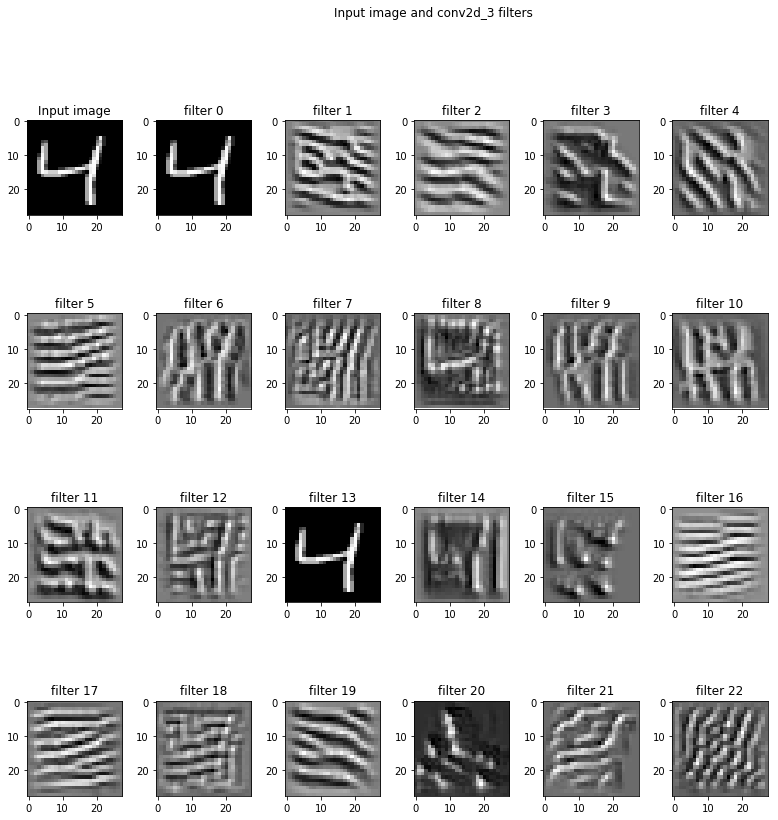

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Convolution2D
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()